In [24]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scipy.signal import ellip, freqz, group_delay

In [25]:
fig, ax = plt.subplots()
ax.set_xlim((0,2))
ax.set_ylim((-2,2))
myplot, = ax.plot([],[],lw=2)
plt.close()

def init():
    myplot.set_data([],[])
    return (myplot,)

def animate(i):
    M = i
    b0, bm = 1,1
    A = [1]
    B = np.zeros(M+1)
    B[0], B[M] = b0,bm

    w,h = freqz(B,A)
    myplot.set_data(w,np.abs(h))
    return (myplot,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=10, interval=500, blit=True)

HTML(anim.to_html5_video())

# Pole Zero

In [26]:
from matplotlib import patches
from scipy.signal import zpk2tf
from matplotlib import gridspec

In [185]:
angles = np.linspace(0,1,50,endpoint=False)
p_vals = np.linspace(0.6,1.4,50,endpoint=False)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6), gridspec_kw={'height_ratios': [2, 1]})

# intialize two line objects (one in each axes)
line0_0 = ax1.scatter([1,1,], [1,1],c=["r","b"])
line0_1, = ax1.plot([], [], lw=2, color='r')
line0_2, = ax1.plot([], [], lw=2, color='b')

line1_0, = ax2.plot([], [], lw=2, color='r')
line = [[line0_0, line0_1,line0_2], line1_0]

# the same axes initalizations as before (just now we do it for both of them)
for ax in [ax1, ax2]:
    ax.set_ylim(-2, 2)
    ax.set_xlim(-2, 2)
    ax.grid()

ax1.set_aspect('equal')
plt.close() 

def animate(i):
    arrow = np.exp(2j*np.pi*angles[i])
    # the circle plot
    p = p_vals[i]
    line[0][0].set_offsets([[p,0],[1/p,0]],)
    # line[0][0].set_array(["r","b"])
    line[0][1].set_data([[p,arrow.real],[0,arrow.imag]])
    line[0][2].set_data([[1/p,arrow.real],[0,arrow.imag]])
    
    # the phase plot
    A,B = [1,p],[1,1/p]
    w,h = freqz(B,A) 
    
    line[1].set_data(w,h)
    
    return (myplot,)

anim = animation.FuncAnimation(fig, animate,
                               frames=50, interval=100)

HTML(anim.to_html5_video())


/home/imilas/miniconda3/envs/filters/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


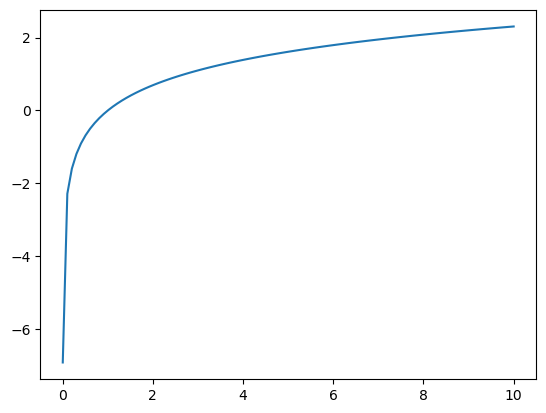

In [189]:
x = np.linspace(0.001,10,100)
plt.plot(x, np.log(x))

In [203]:
10*np.log10(2)

3.010299956639812

In [220]:
np.arctan(3**0.5), 2*np.pi/6

(1.0471975511965976, 1.0471975511965976)

In [225]:
10*np.log(1/(2**0.5))

-3.4657359027997274